In [1]:
__author__ = 'Aleksandar Skrbic'

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

PATH = '../../images/bloodcells.jpg'

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 10, 8

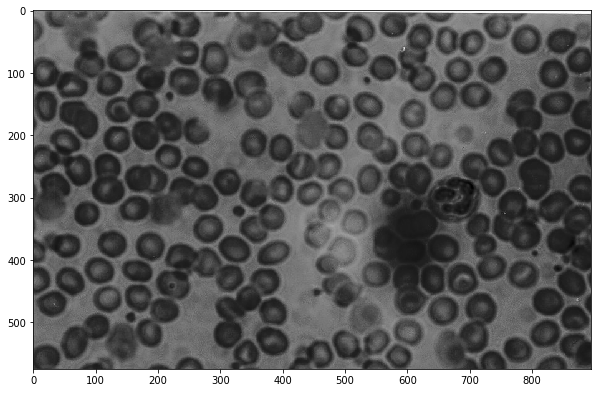

In [3]:
img = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')

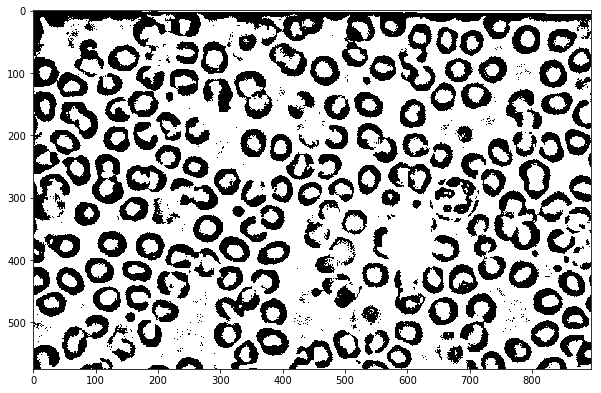

In [4]:
image_ada_bin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
plt.imshow(image_ada_bin, 'gray')

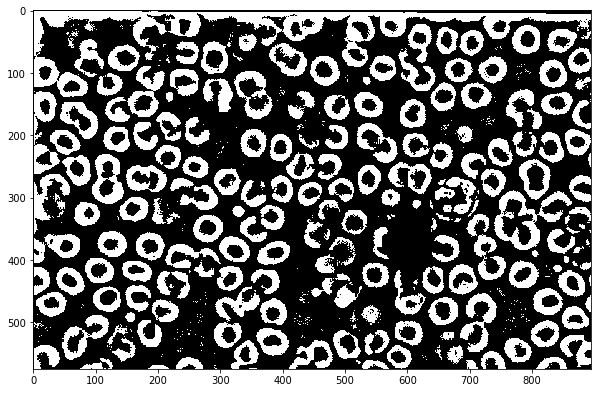

In [5]:
inverted = cv2.bitwise_not(image_ada_bin)
plt.imshow(inverted, 'gray')

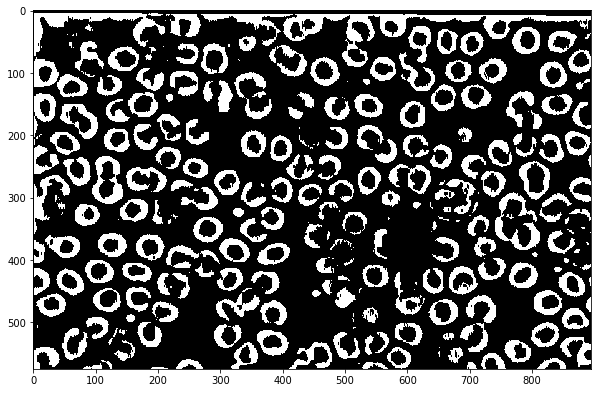

In [6]:
inverted = cv2.erode(inverted, (3,3), iterations=3)
plt.imshow(inverted, 'gray')

Number of regions 496


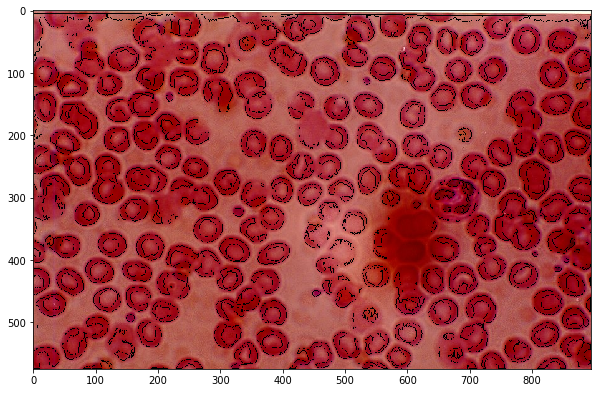

In [7]:
img, contours, hierarchy = cv2.findContours(inverted, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)
cv2.drawContours(img, contours, -1, (0, 0, 0), 1)
print('Number of regions {}'.format(len(contours)))
plt.imshow(img)

There is ~171 bloodcells on image.


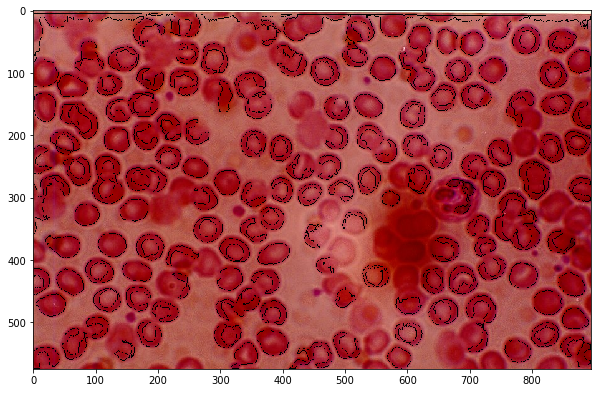

In [8]:
contours_bloodcells = []
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour)
    width, height = size
    if width > 22 and height > 25:
        contours_bloodcells.append(contour)

print("There is ~{} bloodcells on image.".format(len(contours_bloodcells)))
img = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)
cv2.drawContours(img, contours_bloodcells, -1, (0, 0, 0), 1)
plt.imshow(img)